In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\arjav\OneDrive\Documents\Projects\Data of Projects\adult 3.csv")

# Preview
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
# Shape and info
print("Shape of dataset:", df.shape)
df.info()

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Unique values
print("\nUnique values in each column:\n", df.nunique())


Shape of dataset: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing values:
 age                0
workcla

In [3]:
# Strip extra whitespaces if any (especially in object columns)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop rows with missing values (or handle them as needed)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

print("Cleaned shape:", df.shape)


C:\Users\arjav\AppData\Local\Temp\ipykernel_1068\3534062437.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Cleaned shape: (45222, 15)


In [4]:
# Check object columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols.tolist())

# One-hot encode
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
5,34,198693,6,0,0,30,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


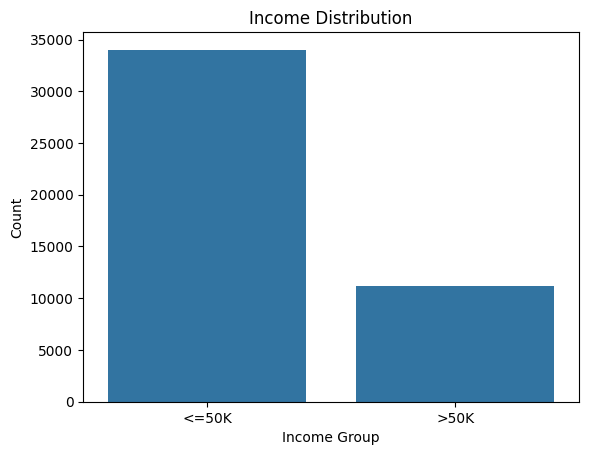

In [5]:
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.show()


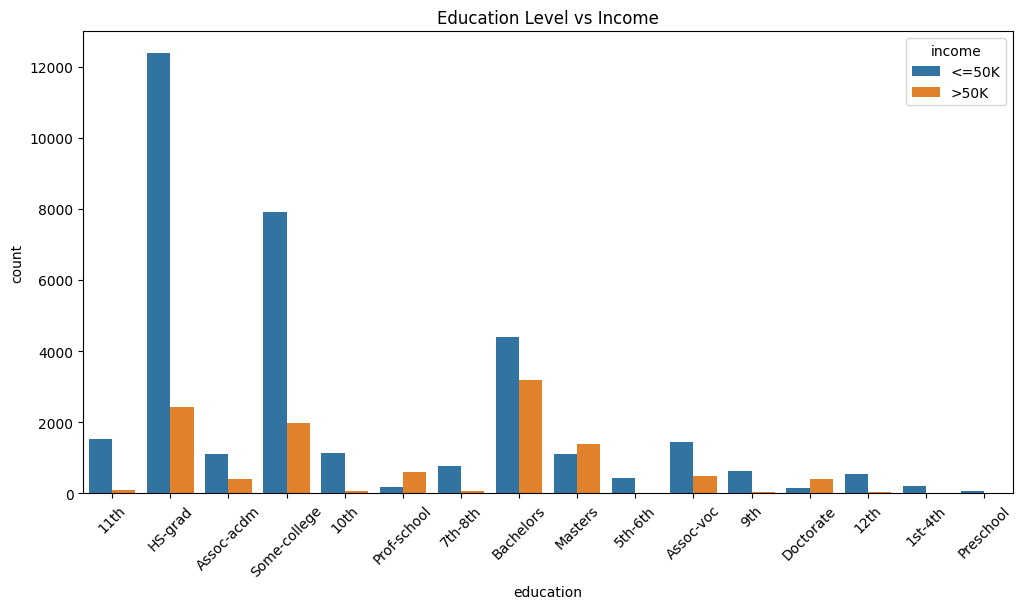

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', hue='income')
plt.title("Education Level vs Income")
plt.xticks(rotation=45)
plt.show()


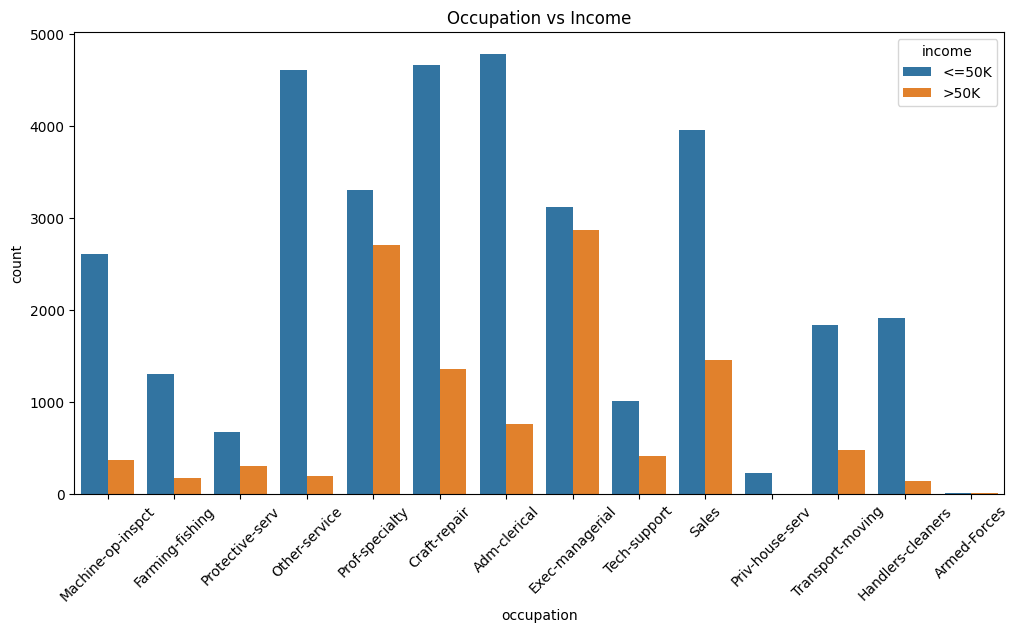

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='occupation', hue='income')
plt.title("Occupation vs Income")
plt.xticks(rotation=45)
plt.show()


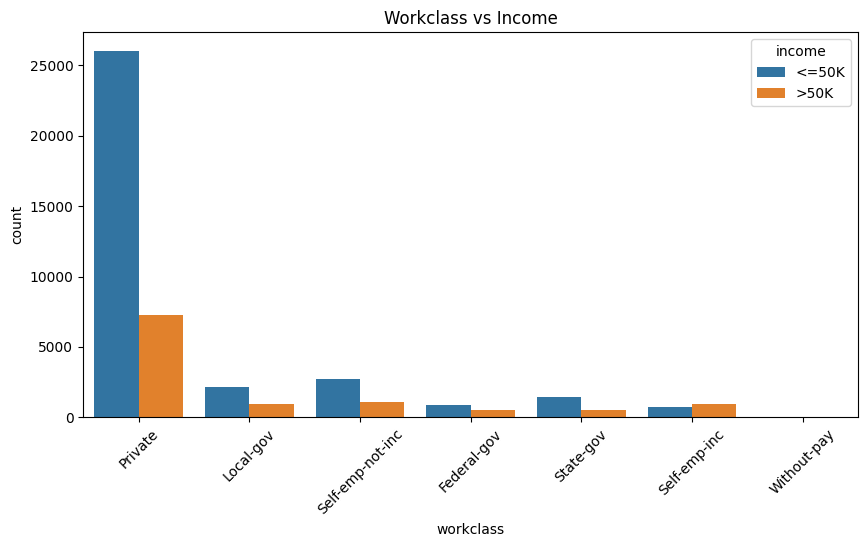

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Workclass vs Income")
plt.xticks(rotation=45)
plt.show()


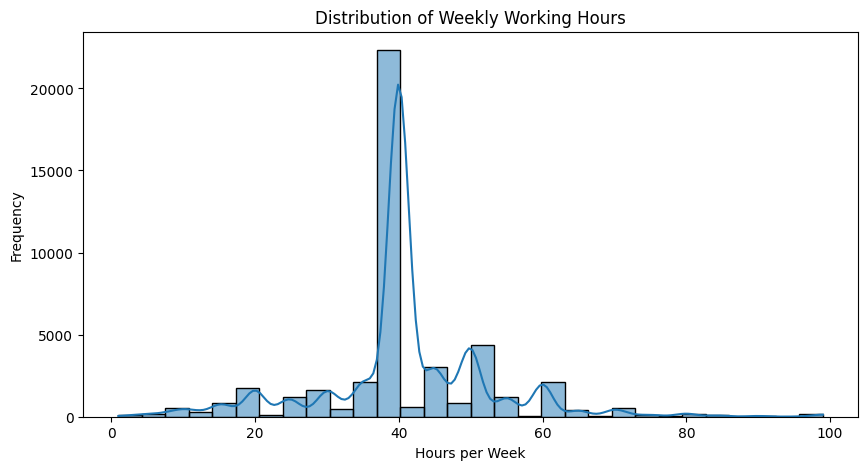

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['hours-per-week'], kde=True, bins=30)
plt.title("Distribution of Weekly Working Hours")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()


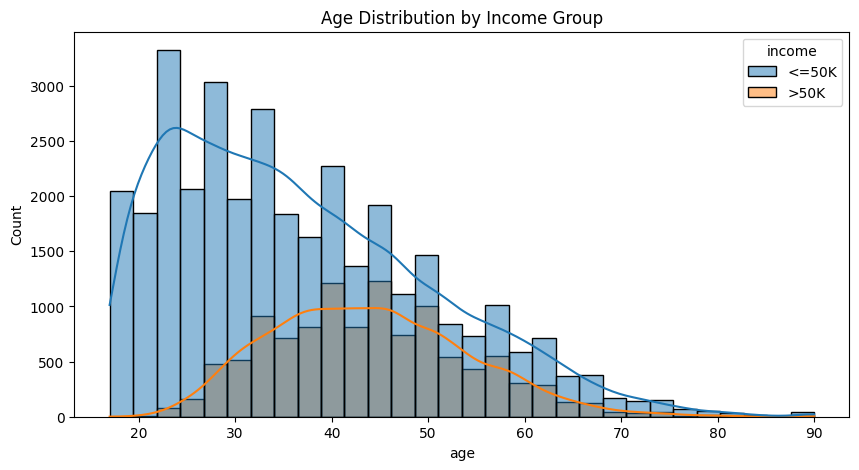

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='income', kde=True, bins=30)
plt.title("Age Distribution by Income Group")
plt.show()


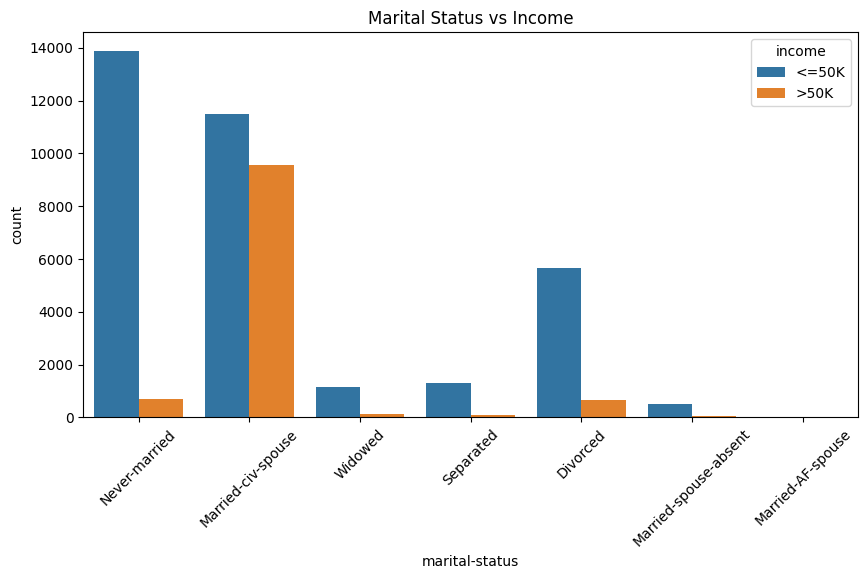

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital-status', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Marital Status vs Income")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Assume 'income_>50K' or similar is your target column
target_col = [col for col in df_encoded.columns if 'income' in col][0]
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]  # This will be binary: 0 or 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.852294085129906

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.93      0.90      6842
        True       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



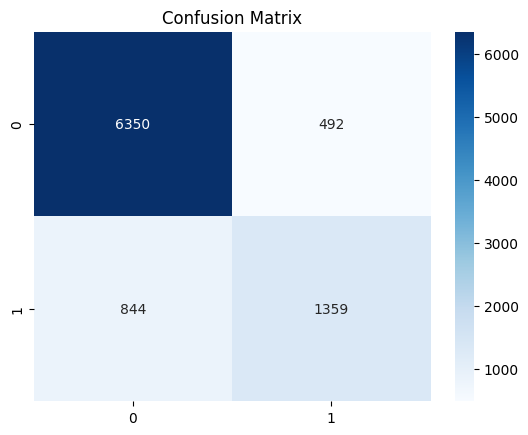

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


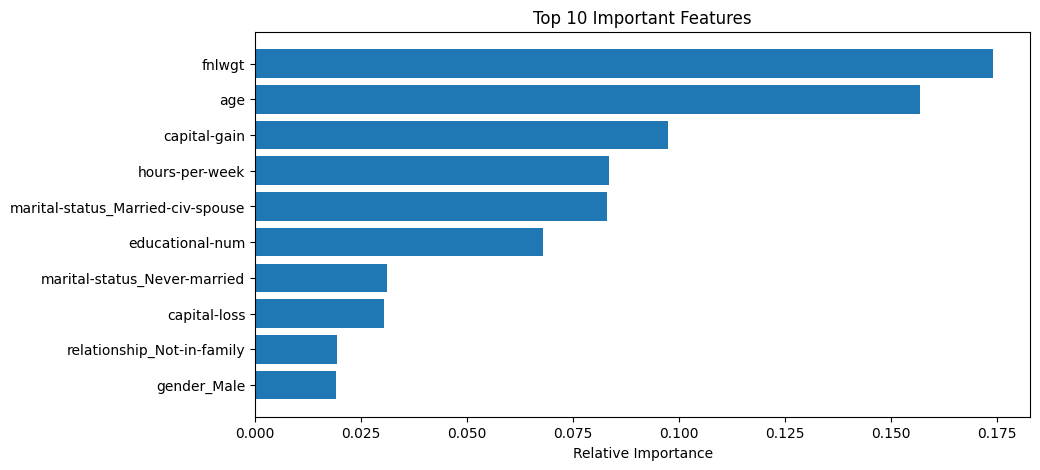

In [14]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features
plt.figure(figsize=(10,5))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


C:\Users\arjav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8467
Random Forest Accuracy: 0.8528
Gradient Boosting Accuracy: 0.8689


In [16]:
from sklearn.model_selection import cross_val_score

# Use Random Forest
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation scores: [0.84477612 0.84809287 0.84973463 0.85050862 0.85670057]
Average accuracy: 0.8499625637110043


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [18]:
import joblib

# Save model to disk
joblib.dump(model, 'salary_model.pkl')

# Save feature column names
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')

print("Model and columns saved successfully.")


Model and columns saved successfully.


In [19]:
import os

print("Model exists:", os.path.exists('salary_model.pkl'))
print("Columns saved:", os.path.exists('model_columns.pkl'))


Model exists: True
Columns saved: True


In [20]:
model = joblib.load('salary_model.pkl')
columns = joblib.load('model_columns.pkl')


C:\Users\arjav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8467
Random Forest Accuracy: 0.8500
Gradient Boosting Accuracy: 0.8689


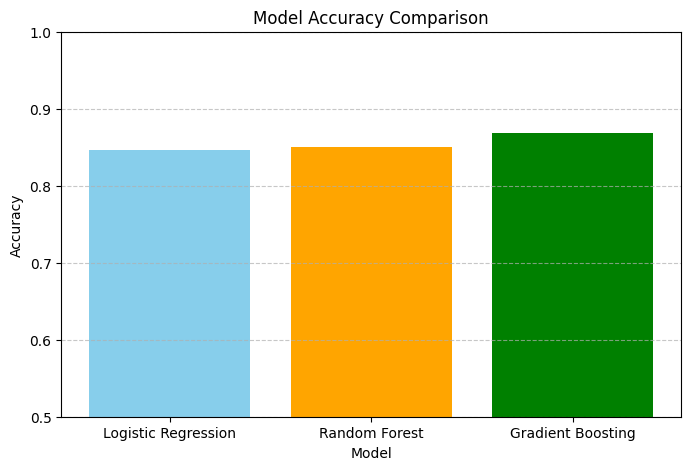

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store accuracy for each
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'orange', 'green'])
plt.ylim(0.5, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
